In [7]:

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from shutil import copyfile
import zipfile
import random
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
import matplotlib.pyplot as plt
%matplotlib inline


In [17]:
# import sys
# from PIL import Image

In [2]:

import tensorflow as tf
print(tf.__version__)


2.16.1


In [3]:

# List all available physical devices
physical_devices = tf.config.list_physical_devices()
print("Available physical devices:", physical_devices)

# Specifically check for GPU availability
gpus = tf.config.list_physical_devices('GPU')
if len(gpus) > 0:
    print(f"GPU is available: {gpus}")
else:
    print("GPU is not available.")


Available physical devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
GPU is not available.


In [4]:

os.getcwd()


'/Users/chidam_sp'

In [14]:
del history, model_training, train_val_generators, model_build

NameError: name 'history' is not defined

In [8]:

def train_val_generators(TRAINING_DIR, TESTING_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255, 
                                       rotation_range = 40,
                                     width_shift_range = 0.2,
                                     height_shift_range = 0.2,
                                     shear_range = 0.2,
                                     zoom_range = 0.2,
                                     horizontal_flip = True,
                                     fill_mode='nearest')


    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR, 
                                                        batch_size=128, class_mode='binary', target_size=(150, 150))
    # save_to_dir=/tmp/img-data-gen-outputs
    
    validation_datagen = ImageDataGenerator(rescale=1./255)
    
    validation_generator = validation_datagen.flow_from_directory(directory=TESTING_DIR, 
                                                                  batch_size=32, class_mode='binary', target_size=(150, 150))
    
    return train_generator, validation_generator

def model_build():
    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2, 2),
        # tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

#How to set up a CV loop for a computer vision problem?

def model_training(EPOCHS, model_checkpoint_path):
    import datetime
    start_time = datetime.datetime.now()
    train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)
    callbacks = myCallback()
    model = model_build()
    # early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
    #                                             patience=patience,
    #                                             mode='min')
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint(model_checkpoint_path, monitor='loss', mode='min', save_best_only=True)
    history = model.fit(train_generator, epochs=EPOCHS, validation_data=validation_generator, verbose=1, callbacks=[callbacks, model_checkpoint])
    end_time = datetime.datetime.now()
    print("Training time: ", end_time - start_time)
    return history


In [9]:

TRAINING_DIR = '/Users/chidam_sp/Desktop/train_valid_split/training/'
TESTING_DIR = '/Users/chidam_sp/Desktop/train_valid_split/testing/'

model_checkpoint_path = '/Users/chidam_sp/Desktop/cats_vs_dogs/conv2d_stacked_model.keras'
history = model_training(10, model_checkpoint_path)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/176 ━━━━━━━━━━━━━━━━━━━━ 40s 544ms/step - accuracy: 0.5208 - loss: 0.6905

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/PIL/TiffImagePlugin.py:890: UserWarning: Truncated File Read
  warnings.warn(str(msg))


176/176 ━━━━━━━━━━━━━━━━━━━━ 94s 514ms/step - accuracy: 0.5351 - loss: 0.6859 - val_accuracy: 0.6220 - val_loss: 0.6551
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 80s 437ms/step - accuracy: 0.6317 - loss: 0.6429 - val_accuracy: 0.6788 - val_loss: 0.6048
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 78s 431ms/step - accuracy: 0.6618 - loss: 0.6180 - val_accuracy: 0.6536 - val_loss: 0.6059
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 97s 537ms/step - accuracy: 0.6738 - loss: 0.6013 - val_accuracy: 0.6172 - val_loss: 0.6343
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 89s 487ms/step - accuracy: 0.6899 - loss: 0.5832 - val_accuracy: 0.7732 - val_loss: 0.4874
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 89s 494ms/step - accuracy: 0.7286 - loss: 0.5408 - val_accuracy: 0.7632 - val_loss: 0.4995
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 94s 519ms/step - accuracy: 0.7369 - loss: 0.5286 - val_accuracy: 0.7924 - val_loss: 0.4539
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 89s 493ms/step - accuracy: 0.7497 - loss: 0.5027 - val

In [10]:

def plot_learning_curve_metric(history, lower_limit, upper_limit):
    plt.plot(history['accuracy'], label='training_accuracy')
    plt.plot(history['val_accuracy'], label='validation_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='lower right')

def plot_learning_curve_loss(history, lower_limit, upper_limit):
    plt.plot(history['loss'], label='training_loss')
    plt.plot(history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')
    plt.show()


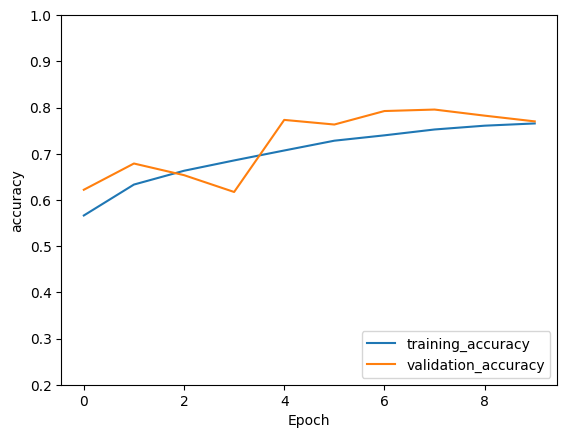

In [12]:

plot_learning_curve_metric(history.history, 0.2, 1)
